In [1]:
from method.utils import split_dataset, train_model, get_metrics, calculate_permutation_importance
from method.classifier import Single_GRU
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}

In [2]:
"""
For this example, I am using a random X matrix from the sleep stages, a few channels, a few epochs, a single fold, etc.
Therefore, the results do NOT represent the reportes results. 
The objective of the code is to show the whole process for classification and channel selection.
""";

PATH_cp = r"checkpoints\\"#checkpoints\\ or checkpoints/ Path to save temporary checkpoints
epochs_fit = 20
chs_all = np.array(['ch1','ch2','ch3','ch4'])
labels_important = ["Accuracy","Fscore","Precision","Recall","Auroc","Kappa"]

In [3]:
X = np.load("X.npy")
y = np.load("y.npy")
no_class = np.unique(y).size
_, no_chs, no_datap = X.shape
print(X.shape, Counter(y))
print("no_chs: {0}, no_datap: {1}, no_class: {2}".format(no_chs, no_datap, no_class))

(5000, 4, 256) Counter({3: 1635, 2: 1460, 1: 825, 0: 600, 4: 480})
no_chs: 4, no_datap: 256, no_class: 5


In [4]:
X_train, X_validation, X_test, y_train, y_validation, y_test  = split_dataset(X, y, val_size=0.5, test_size=0.5)
print("Train: ",X_train.shape, Counter(y_train.argmax(axis=-1)))
print("Validation: ", X_validation.shape, Counter(y_validation.argmax(axis=-1)))
print("Test: ", X_test.shape, Counter(y_test.argmax(axis=-1)))

Train:  (2500, 4, 256) Counter({3: 819, 2: 735, 1: 401, 0: 303, 4: 242})
Validation:  (1250, 4, 256) Counter({3: 406, 2: 366, 1: 213, 0: 143, 4: 122})
Test:  (1250, 4, 256) Counter({3: 410, 2: 359, 1: 211, 0: 154, 4: 116})


In [5]:
model = Single_GRU(no_chs, no_datap, no_class)
model, _history = train_model(PATH_cp,"subject_X", model, X_train, X_validation, y_train, y_validation, epochs_fit, no_class)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.52798, saving model to checkpoints\cp_subject_X_ETO9HW9CHJ.h5
157/157 - 12s - loss: 1.5417 - accuracy: 0.3312 - val_loss: 1.5280 - val_accuracy: 0.3248 - 12s/epoch - 74ms/step
Epoch 2/20

Epoch 2: val_loss improved from 1.52798 to 1.47918, saving model to checkpoints\cp_subject_X_ETO9HW9CHJ.h5
157/157 - 4s - loss: 1.5143 - accuracy: 0.3200 - val_loss: 1.4792 - val_accuracy: 0.3248 - 4s/epoch - 25ms/step
Epoch 3/20

Epoch 3: val_loss improved from 1.47918 to 1.38738, saving model to checkpoints\cp_subject_X_ETO9HW9CHJ.h5
157/157 - 3s - loss: 1.4724 - accuracy: 0.3360 - val_loss: 1.3874 - val_accuracy: 0.4152 - 3s/epoch - 20ms/step
Epoch 4/20

Epoch 4: val_loss improved from 1.38738 to 1.25646, saving model to checkpoints\cp_subject_X_ETO9HW9CHJ.h5
157/157 - 3s - loss: 1.3938 - accuracy: 0.3988 - val_loss: 1.2565 - val_accuracy: 0.3824 - 3s/epoch - 21ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 1.25646
157/157 - 3s - loss

In [6]:
model_acc = round(_history["accuracy"][-1],3)
val_acc = round(_history["val_accuracy"][-1],3)
"model_acc: {0}, val_acc: {1}".format(model_acc, val_acc)

'model_acc: 0.626, val_acc: 0.621'

40/40 [==============================] - 2s 8ms/step
model_acc: 0.626, val_acc: 0.621, acc: 0.635, fscore: 0.646, precision: 0.697, recall: 0.634, auroc: 0.895, kappa: 0.516


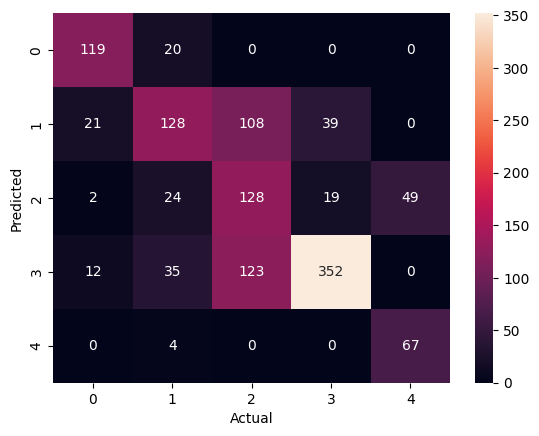

In [7]:
probs = model.predict(X_test)
preds = probs.argmax(axis=-1)
_acc,_fscore,_precision,_recall,_auroc, _kappa = get_metrics(y_test.argmax(axis=-1), preds, probs, cmatrix_plot=True)
print("model_acc: {0}, val_acc: {1}, acc: {2}, fscore: {3}, precision: {4}, recall: {5}, auroc: {6}, kappa: {7}".format(model_acc, val_acc, _acc, _fscore, _precision, _recall, _auroc, _kappa))

In [8]:
importances_acc,importances_fscore,importances_precision,importances_recall,importances_auroc,importances_kappa = calculate_permutation_importance(model, X_test, y_test)

40/40 [==============================] - 0s 8ms/step
acc:  0.635 fscore:  0.646 precision:  0.697 recall:  0.634 auroc:  0.895 kappa:  0.516
0
40/40 [==============================] - 0s 7ms/step
acc:  0.496 fscore:  0.484 precision:  0.586 recall:  0.468 auroc:  0.78 kappa:  0.326
1
40/40 [==============================] - 0s 9ms/step
acc:  0.324 fscore:  0.271 precision:  0.314 recall:  0.278 auroc:  0.592 kappa:  0.09
2
40/40 [==============================] - 0s 10ms/step
acc:  0.544 fscore:  0.529 precision:  0.615 recall:  0.525 auroc:  0.854 kappa:  0.388
3
40/40 [==============================] - 0s 9ms/step
acc:  0.594 fscore:  0.572 precision:  0.646 recall:  0.57 auroc:  0.874 kappa:  0.457


In [9]:
all_importances = np.array([importances_acc, importances_fscore, importances_precision, importances_recall, importances_auroc, importances_kappa])
all_importances.shape

(6, 4)

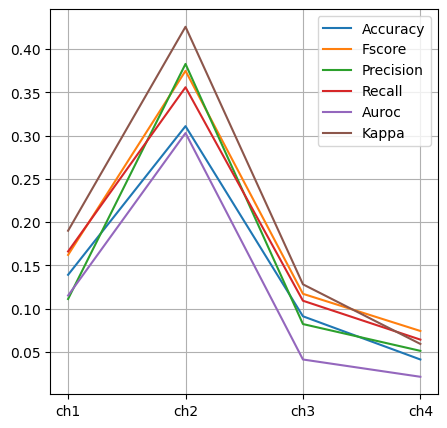

In [10]:
plt.rcParams['figure.figsize'] = [5, 5]
for ii, importances in enumerate(all_importances):
    plt.plot(chs_all, importances, label=labels_important[ii])
plt.grid()
plt.legend()
plt.show()

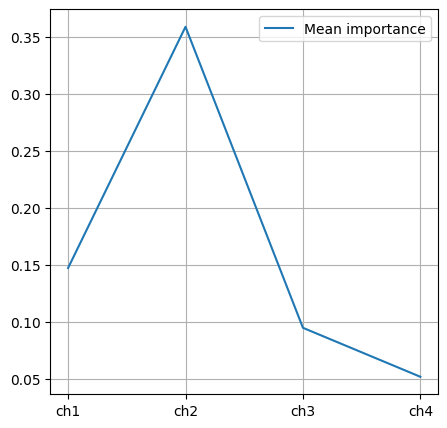

In [11]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(chs_all, all_importances.mean(axis=0), label="Mean importance")
plt.grid()
plt.legend()
plt.show()